<a href="https://colab.research.google.com/github/WeizmannML/course2020/blob/master/Tutorial1/Linear_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

plt.rcParams["figure.figsize"] = (10,10)


### Load the dataset

Lets make a dataset where $y = x +  \frac{3}{10} sin(x) + 
\frac{1}{10} \Big( log(x) \Big)^2 + \epsilon$,  where $\epsilon$ is a random number

In [3]:
N_data = 5000

data_x = np.linspace(1.0, 10.0, N_data)[:, np.newaxis]
data_y = data_x + 0.2*np.random.randn(N_data,1) + 0.3*np.sin(data_x) + 1e-1  * np.log( data_x ) **2
#data_y = data_x + 0.1*np.random.randn(N_data,1) 

In [4]:
data_x.shape, data_y.shape

((5000, 1), (5000, 1))

Text(0, 0.5, 'Y')

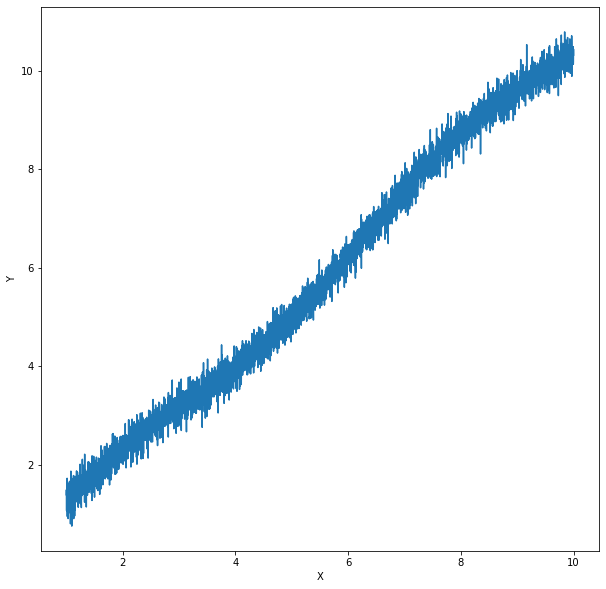

In [5]:
plt.plot( data_x.flatten(), data_y.flatten()  )
plt.xlabel('X')
plt.ylabel('Y')

### Make a train-test split of the available dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [7]:
X_train.shape, y_train.shape

((4000, 1), (4000, 1))

Define the Loss function \\
$L = \frac{1}{2n} \sum_{i=1}^n \Big( y_i^{target} - y_i^{pred} \Big)^2$

In [8]:
# --- declare the L2 distance function between target & prefiction --- #
# def compute_Loss(y_tar, y_pred):

#     return 0.5 * np.mean( pow((y_pred- y_tar),2) )

For a liner regression $y = Wx + b$ \\
So, $\frac{\partial L}{\partial W} = \frac{1}{n} \sum_{i=1}^n \Big( y_i - y_i^{pred} \Big).x_i$ \\
$\frac{\partial L}{\partial b} = \frac{1}{n} \sum_{i=1}^n \Big( y_i - y_i^{pred} \Big)$

The weights are updated following the rule : \\
$W = W - \eta \frac{\partial L}{\partial W} $ \\
$b = b - \eta \frac{\partial L}{\partial b} $ \\
where $\eta$ is the learning rate

In [9]:
tolerance = 1e-7 # numerical value to check if the gradient vanishes

In [10]:
class LinearRegression():
    def __init__(self, X, y, lr=0.001):

        self.lr = lr
        self.n_samples = len(y)
        self.n_features = X.shape[1]
        self.X = X
        self.y = y
        self.W = np.ones( (self.n_features ,1) )
        self.b = np.zeros( (1,1) )

    def fit(self, n_iter=1500): 

        for i in range(n_iter):

            y_pred = ( self.X ).dot( self.W)  + self.b

            loss = self.compute_Loss( self.y, y_pred )

            grad_weight =np.dot((y_pred-self.y).T,X_train)/self.n_samples

            grad_bias = np.mean(y_pred- self.y)

            if( abs( np.sum(grad_weight) ) < tolerance and abs(grad_bias) < tolerance ) : break

            self.W = self.W - self.lr * grad_weight.T
            self.b = self.b - self.lr * grad_bias


    def predict(self, X) : 

        y_pred = ( X ).dot( self.W)  + self.b
        return y_pred

    def params(self) : 

        weight_dict = {}
        weight_dict['weight'] = self.W
        weight_dict['bias'] = self.b

        return weight_dict
    
    # -- the L2 loss as a member function -- #
    def compute_Loss(self, y_tar, y_pred):

        return 0.5 * np.mean( pow((y_pred- y_tar),2) )

In [11]:
#del learn

In [12]:
learn = LinearRegression(X_train, y_train, lr=1e-4)

In [13]:
learn.fit(n_iter=1000)

In [14]:
y_pred = learn.predict( X_test)

In [15]:
y_pred.shape, y_test.shape

((1000, 1), (1000, 1))

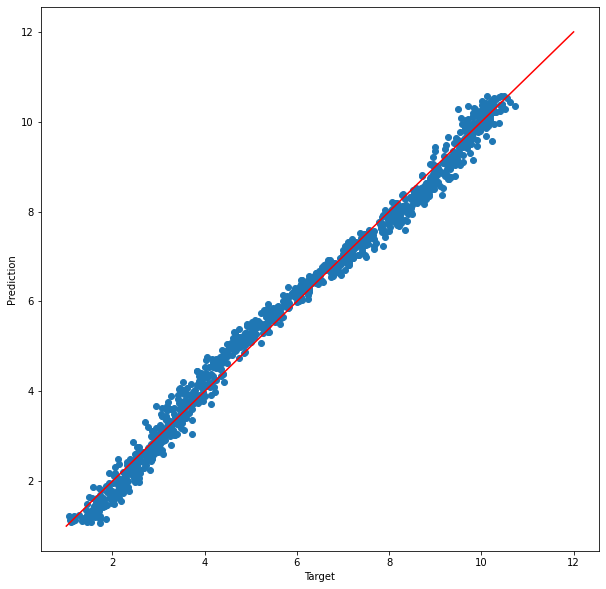

In [16]:
plt.scatter( y_test.flatten(), y_pred.flatten()  )
plt.xlabel('Target')
plt.ylabel('Prediction')

plt.plot( np.linspace(1,12, 1000), np.linspace(1,12, 1000), color='r', linewidth=1.5 )

In [17]:
learn.params()

{'weight': array([[1.05656685]]), 'bias': array([[0.0078585]])}

In [18]:
np.log(8)

2.0794415416798357